# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    signdict = {rows[0]:rows[1] for rows in reader}
    


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_valid[-1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

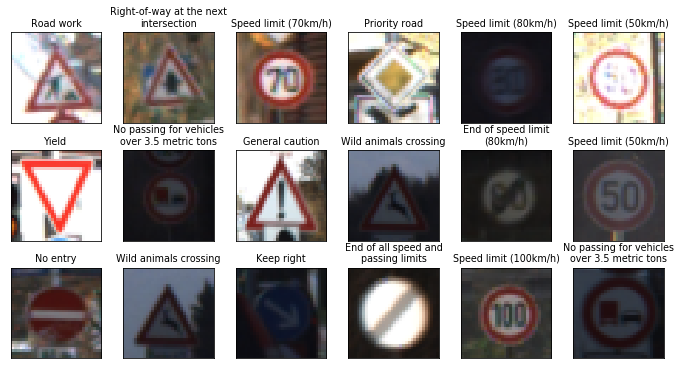

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
from textwrap import wrap
# Visualizations will be shown in the notebook.
%matplotlib inline

examples = []

for i in range(18):
    examples.append(random.randrange(0,n_train-1))

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.size'] = 8

for ax, ex in zip(axes.flat, examples):
    ax.imshow(X_train[ex])
    ax.set_title("\n".join(wrap(signdict[str(train['labels'][ex])],25)))

plt.show()

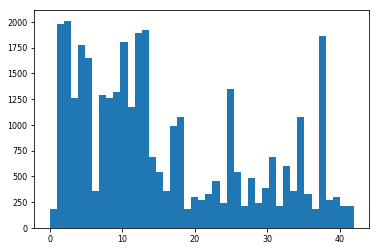

In [4]:
plt.hist(y_train, bins=n_classes)
plt.show()
number_of_most_common_class=np.amax(np.histogram(y_train,range(0,n_classes+1))[0])

Class:0 - 180
Samples to generate:2320
Class:1 - 1980
Samples to generate:520
Class:2 - 2010
Samples to generate:490
Class:3 - 1260
Samples to generate:1240
Class:4 - 1770
Samples to generate:730
Class:5 - 1650
Samples to generate:850
Class:6 - 360
Samples to generate:2140
Class:7 - 1290
Samples to generate:1210
Class:8 - 1260
Samples to generate:1240
Class:9 - 1320
Samples to generate:1180
Class:10 - 1800
Samples to generate:700
Class:11 - 1170
Samples to generate:1330
Class:12 - 1890
Samples to generate:610
Class:13 - 1920
Samples to generate:580
Class:14 - 690
Samples to generate:1810
Class:15 - 540
Samples to generate:1960
Class:16 - 360
Samples to generate:2140
Class:17 - 990
Samples to generate:1510
Class:18 - 1080
Samples to generate:1420
Class:19 - 180
Samples to generate:2320
Class:20 - 300
Samples to generate:2200
Class:21 - 270
Samples to generate:2230
Class:22 - 330
Samples to generate:2170
Class:23 - 450
Samples to generate:2050
Class:24 - 240
Samples to generate:2260
Clas

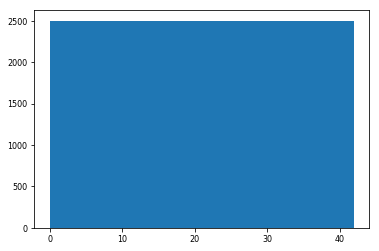

In [5]:
import Automold as am
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import cv2


def random_jitter_and_rotation(image: ndarray):
    # Store height and width of the image 
    height, width = image.shape[:2]
    random_degree = random.uniform(-20, 20)
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, random_degree, 1.0)
    image = cv2.warpAffine(image, rot_mat, (width, height), flags=cv2.INTER_LINEAR) 
    T = np.float32([[1, 0, random.randint(-2,2)], [0, 1, random.randint(-2,2)]]) 
    # We use warpAffine to transform 
    # the image using the matrix, T 
    return cv2.warpAffine(image, T, (width, height)) 

def generate_n_random_image_permutations(image_array_to_sample_from: ndarray, n):
    sample_size=image_array_to_sample_from.shape[0]
    new_images = np.zeros((n,)+X_train.shape[1:], dtype=np.uint8)
    for i in range(0,n):
        sample_image = image_array_to_sample_from[random.randint(0,sample_size-1)]
        #plt.imshow(sample_image)
        #plt.show()
        generated_image = random_jitter_and_rotation(sample_image)
        if random.randint(0,1)>0:
            generated_image = am.add_shadow(generated_image)
        #generated_image = am.add_speed(generated_image)
        #plt.imshow(generated_image)
        #plt.show()
        new_images[i] = generated_image
    return new_images


hist_of_num_samples_each_class = np.histogram(y_train,range(0,n_classes+1))
DESIRED_NUMBER_OF_IMAGES_FOR_EACH_CLASS = 2500

for c in range(0,len(hist_of_num_samples_each_class[0])):
    print("Class:" + str(hist_of_num_samples_each_class[1][c]) + " - " + str(hist_of_num_samples_each_class[0][c]))
    samples_in_class = hist_of_num_samples_each_class[0][c]
    number_of_samples_to_generate = DESIRED_NUMBER_OF_IMAGES_FOR_EACH_CLASS - samples_in_class
    print("Samples to generate:" + str(number_of_samples_to_generate))
    indices_of_existing_sample_images = np.argwhere(y_train==c)
    #print(indexes_of_existing_sample_images)
    images_for_class = np.take(X_train,indices_of_existing_sample_images,axis=0).reshape((samples_in_class,) + X_train.shape[1:])
    #print(images_for_class.shape)
    #plt.imshow(images_for_class[0])
    #plt.show()
    if(number_of_samples_to_generate>0):
        generated_images = generate_n_random_image_permutations(images_for_class,number_of_samples_to_generate)

        """fig, axes = plt.subplots(3, 6, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
        fig.subplots_adjust(hspace=0.3, wspace=0.05)
        plt.rcParams['font.size'] = 8

        for ax, ex in zip(axes.flat, range(0,18)):
            ax.imshow(generated_images[ex,:,:])"""
        #plt.imshow(generated_images[-1])
        #plt.show()
        X_train = np.concatenate((X_train,generated_images),axis=0)
        y_train = np.concatenate((y_train,np.full((number_of_samples_to_generate),c)))

    
plt.hist(y_train, bins=n_classes)
plt.show()

In [6]:
print(X_train.shape)
print(y_train.shape)

(107500, 32, 32, 3)
(107500,)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import cv2

number_of_channels = 3

def preprocess(input):
    output = np.zeros(input.shape[0:3] + (number_of_channels,))
    for i in range(input.shape[0]):
        #print("pre mean: " + str(np.mean(input[i])))
        #input[i] = (input[i] - np.mean(input[i])) // np.std(input[i])
        yuv = cv2.cvtColor(input[i], cv2.COLOR_RGB2YUV)
        y_float = yuv[:,:,0].astype(np.float32) / 255.0
        blur = cv2.GaussianBlur(y_float, (0, 0), sigmaX=2, sigmaY=2)
        num = y_float - blur
        blur = cv2.GaussianBlur(num*num, (0, 0), sigmaX=2, sigmaY=2)
        den = cv2.pow(blur, 0.5)
        y = num / den
        y_norm = cv2.normalize(y, dst=y, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX)
        
        hue = cv2.cvtColor(input[i], cv2.COLOR_RGB2HSV)[:,:,0] #note inversion of rgb prior to conversion
        red = np.minimum(hue, 180-hue)/20 #center around red
        red = np.exp(-red*red) - 0.5
        #hue = cv2.cvtColor(input[i], cv2.COLOR_RGB2HSV)[:,:,0]
        blue = (hue - 105)/20 #center around blue
        blue = np.exp(-blue*blue) - 0.5
        
        output[i,:,:,0] = y_norm
        #output[i,:,:,1] = (yuv[:,:,1] - np.mean(yuv[:,:,1])) / np.std(yuv[:,:,1])
        output[i,:,:,1] = red
        #output[i,:,:,1] = (yuv[:,:,2] - np.mean(yuv[:,:,2])) / np.std(yuv[:,:,2])
        output[i,:,:,2] = blue
        #output[i] = input[i]
        #print("post mean: " + str(np.mean(input[i])))
    return output





In [8]:
X_train_norm = preprocess(X_train)
X_valid_norm = preprocess(X_valid)
X_test_norm = preprocess(X_test)

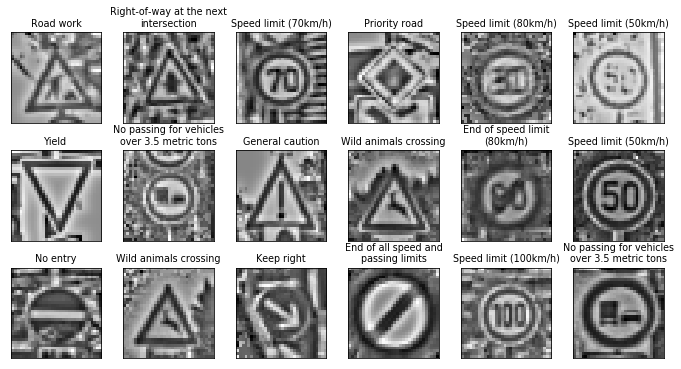

In [9]:
for i in range(18):
    examples.append(random.randrange(0,n_train-1))

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.size'] = 8

for ax, ex in zip(axes.flat, examples):
    ax.imshow(X_train_norm[ex,:,:,0], cmap=plt.get_cmap('gray'))
    ax.set_title("\n".join(wrap(signdict[str(train['labels'][ex])],25)))

plt.show()

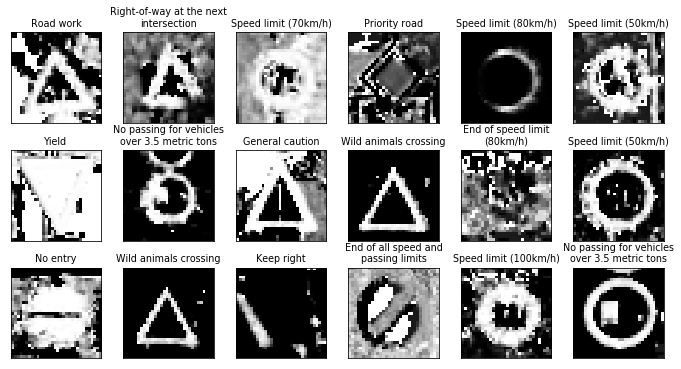

In [10]:

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.size'] = 8

for ax, ex in zip(axes.flat, examples):
    ax.imshow(X_train_norm[ex,:,:,1], cmap=plt.get_cmap('gray'))
    ax.set_title("\n".join(wrap(signdict[str(train['labels'][ex])],25)))

plt.show()

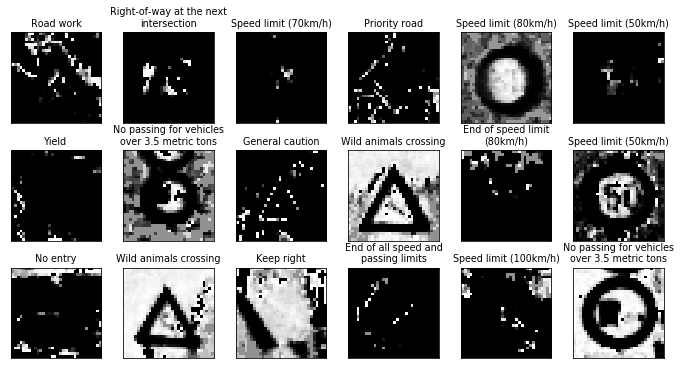

In [11]:
for i in range(18):
    examples.append(random.randrange(0,n_train-1))

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.size'] = 8

for ax, ex in zip(axes.flat, examples):
    ax.imshow(X_train_norm[ex,:,:,2], cmap=plt.get_cmap('gray'))
    ax.set_title("\n".join(wrap(signdict[str(train['labels'][ex])],25)))

plt.show()

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten


#Not used
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, number_of_channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6,dtype=tf.float32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def sermanet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x100.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 100), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(100,dtype=tf.float32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x100. Output = 14x14x100.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x200.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 100, 200), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(200))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x200. Output = 5x5x200.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x200 + 14x14x100. Output = 24600.
    fc0 = tf.concat((flatten(conv1),flatten(conv2)), axis=1)
    
    # Layer 3: Fully Connected. Input = 24600. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(24600, 43), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(43))
    return tf.matmul(fc0, fc1_W) + fc1_b
     

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
from sklearn.utils import shuffle
import tensorflow as tf

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

EPOCHS = 10
BATCH_SIZE = 32

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = sermanet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
prediction_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [17]:
X_train_norm = np.reshape(X_train_norm[:,:,:,0],X_train_norm.shape[0:3]+(1,))
X_valid_norm = np.reshape(X_valid_norm[:,:,:,0],X_valid_norm.shape[0:3]+(1,))
X_test_norm = np.reshape(X_test_norm[:,:,:,0],X_test_norm.shape[0:3]+(1,))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    last_validation_accuracy = 0.0
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train_norm, y_train)
        
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if(validation_accuracy-last_validation_accuracy < 0):
            #reduce learning rate if no convergence 
            rate = rate/3
            print("No improvement in accuracy - reducing learning rate to = {:.5f}".format(rate))
            
        last_validation_accuracy = validation_accuracy
    
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, './sermanet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.971
Validation Accuracy = 0.979

EPOCH 2 ...
Training Accuracy = 0.986
Validation Accuracy = 0.974

No improvement in accuracy - reducing learning rate to = 0.00033
EPOCH 3 ...
Training Accuracy = 0.992
Validation Accuracy = 0.976

EPOCH 4 ...
Training Accuracy = 0.994
Validation Accuracy = 0.979

EPOCH 5 ...
Training Accuracy = 0.996
Validation Accuracy = 0.975

No improvement in accuracy - reducing learning rate to = 0.00011
EPOCH 6 ...
Training Accuracy = 0.996
Validation Accuracy = 0.975

EPOCH 7 ...
Training Accuracy = 0.995
Validation Accuracy = 0.977

EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.980

EPOCH 9 ...
Training Accuracy = 0.995
Validation Accuracy = 0.978

No improvement in accuracy - reducing learning rate to = 0.00004
EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.981

Test accuracy = 0.964
Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

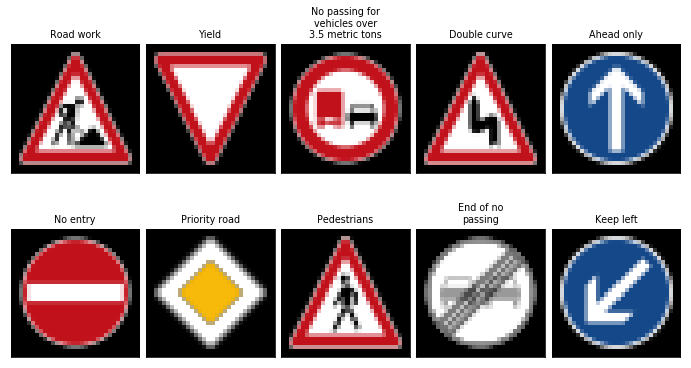

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
import math

example_images = []
example_images_labels = []
example_dir = "./example_images_from_the_web/"

# Loop over each file in the example directory
for file in os.listdir(example_dir):
    filename = os.fsdecode(file)
    if filename.endswith(".jpeg") or filename.endswith(".png") or filename.endswith(".jpg"): 
        image = cv2.imread(os.path.join(example_dir, filename))
        #if image.shape[2]==4:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        dim = (28,28)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image = np.pad(image, ((2,2),(2,2),(0,0)), 'constant')
        example_images.append(image)
        example_images_labels.append(int(filename.split(".")[0]))
        

example_images = np.asarray(example_images)

fig, axes = plt.subplots(math.ceil(len(example_images)/5), 5, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.size'] = 8

for ax, ex in zip(axes.flat, range(0,example_images.shape[0])):
    ax.imshow(example_images[ex])
    ax.set_title("\n".join(wrap(signdict[str(example_images_labels[ex])],15)))

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

example_images_norm = preprocess(np.asarray(example_images))[:,:,:,0]
example_images_norm = np.reshape(example_images_norm,example_images_norm.shape[0:3]+(1,))


sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, './sermanet')

logit = sess.run(logits, feed_dict={x: example_images_norm})



INFO:tensorflow:Restoring parameters from ./sermanet


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy = sess.run(accuracy_operation, feed_dict={x: example_images_norm, y: example_images_labels})
print(accuracy)

1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

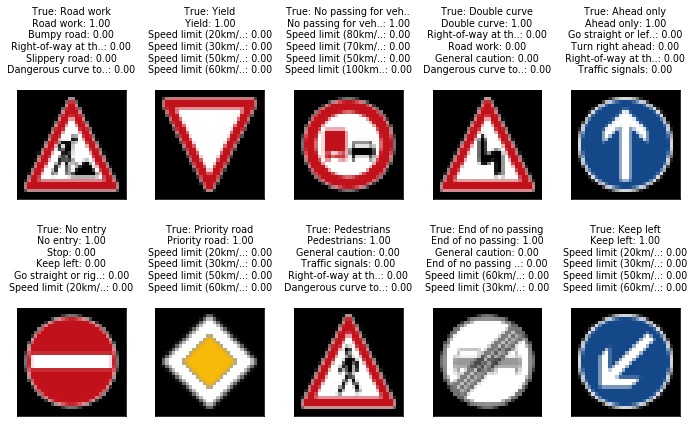

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

probabilities = sess.run(tf.nn.softmax(logit))
top5 = sess.run(tf.nn.top_k(probabilities, k=5))
title_text = []
for ex in range(0,len(top5[1])):
    title_text.append("True: " + signdict[str(example_images_labels[ex])][:18] + (signdict[str(example_images_labels[ex])][18:] and "..") + "\n") 
    for prob in range(0,5):
        title_text[ex] = title_text[ex] + signdict[str(top5[1][ex][prob])][:18] + (signdict[str(top5[1][ex][prob])][17:] and "..") + ": " + "{0:.2f}".format(top5[0][ex][prob]) + "\n"  
        
        

    


fig, axes = plt.subplots(math.ceil(len(example_images)/5), 5, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for ax, ex in zip(axes.flat, range(0,example_images_norm.shape[0])):
    ax.imshow(example_images[ex,:,:])
    ax.set_title(title_text[ex])
    #print(title_text[ex])
 
fig.subplots_adjust(hspace=1)
plt.show()


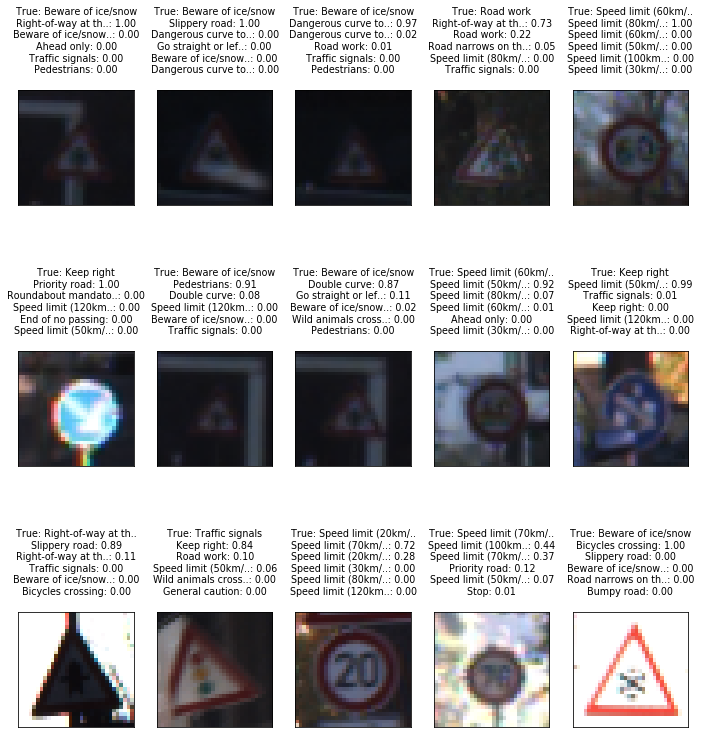

In [18]:
if X_test_norm.shape[1:4] != (32,32,1): 
    X_test_norm = np.reshape(X_test_norm[:,:,:,0],X_test_norm.shape[0:3]+(1,))
prediction = sess.run(prediction_operation, feed_dict={x: X_test_norm, y: y_test})
correct = sess.run(correct_prediction, feed_dict={x: X_test_norm, y: y_test})

incorrect_images = []
incorrect_images_norm = []
incorrect_images_labels = []

for i in range(0,len(correct)):
    if not correct[i]:
        incorrect_images_norm.append(X_test_norm[i])
        incorrect_images.append(X_test[i])
        incorrect_images_labels.append(y_test[i])
        
incorrect_images = np.asarray(incorrect_images)
incorrect_images_norm = np.asarray(incorrect_images_norm)
        
logit = sess.run(logits, feed_dict={x: incorrect_images_norm})
probabilities = sess.run(tf.nn.softmax(logit))
top5 = sess.run(tf.nn.top_k(probabilities, k=5))
title_text = []
for ex in range(0,len(top5[1])):
    title_text.append("True: " + signdict[str(incorrect_images_labels[ex])][:18] + (signdict[str(incorrect_images_labels[ex])][18:] and "..") + "\n") 
    for prob in range(0,5):
        title_text[ex] = title_text[ex] + signdict[str(top5[1][ex][prob])][:18] + (signdict[str(top5[1][ex][prob])][17:] and "..") + ": " + "{0:.2f}".format(top5[0][ex][prob]) + "\n"  
        
        

    


fig, axes = plt.subplots(3, 5, figsize=(12, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

for ax, ex in zip(axes.flat, range(0,15)):
    #ax.imshow(incorrect_images_norm[ex,:,:,0],cmap=plt.get_cmap('gray'))
    ax.imshow(incorrect_images[ex,:,:])
    ax.set_title(title_text[ex])
    #print(title_text[ex])
 
fig.subplots_adjust(hspace=1)
plt.show()

In [31]:
from sklearn import metrics

true = []
pred = []

for i in range(0,len(y_test)):
    true.append( signdict[str(y_test[i])] )
    pred.append( signdict[str(prediction[i])] )
    
labels = ["Speed limit (20km/h)",
"Speed limit (30km/h)",
"Speed limit (50km/h)",
"Speed limit (60km/h)",
"Speed limit (70km/h)",
"Speed limit (80km/h)",
"End of speed limit (80km/h)",
"Speed limit (100km/h)",
"Speed limit (120km/h)",
"No passing",
"No passing for vehicles over 3.5 metric tons",
"Right-of-way at the next intersection",
"Priority road",
"Yield",
"Stop",
"No vehicles",
"Vehicles over 3.5 metric tons prohibited",
"No entry",
"General caution",
"Dangerous curve to the left",
"Dangerous curve to the right",
"Double curve",
"Bumpy road",
"Slippery road",
"Road narrows on the right",
"Road work",
"Traffic signals",
"Pedestrians",
"Children crossing",
"Bicycles crossing",
"Beware of ice/snow",
"Wild animals crossing",
"End of all speed and passing limits",
"Turn right ahead",
"Turn left ahead",
"Ahead only",
"Go straight or right",
"Go straight or left",
"Keep right",
"Keep left",
"Roundabout mandatory",
"End of no passing",
"End of no passing by vehicles over 3.5 metric tons"]

confusion_matrix = metrics.confusion_matrix(true, pred,labels=labels)

print(confusion_matrix)
np.savetxt("confusion.csv", confusion_matrix, delimiter=",")

# Print the precision and recall, among other metrics
print(metrics.classification_report(true, pred, labels=labels, digits=3))

[[ 54   0   0 ...,   0   0   0]
 [  0 705  10 ...,   0   0   0]
 [  0   1 747 ...,   0   0   0]
 ..., 
 [  1   0   0 ...,  79   0   0]
 [  0   0   0 ...,   0  55   0]
 [  0   0   0 ...,   0  11  79]]
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)      0.964     0.900     0.931        60
                              Speed limit (30km/h)      0.999     0.979     0.989       720
                              Speed limit (50km/h)      0.938     0.996     0.966       750
                              Speed limit (60km/h)      0.992     0.878     0.932       450
                              Speed limit (70km/h)      0.983     0.982     0.983       660
                              Speed limit (80km/h)      0.882     0.976     0.927       630
                       End of speed limit (80km/h)      1.000     0.853     0.921       150
                             Speed limit (100km/h)      0.964  

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [3]:
from IPython.display import display, Markdown

with open('writeup.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# **Traffic Sign Recognition** 

## Writeup


**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

[//]: # (Image References)

[image1]: ./writeup_figures/training_set_classes.png
[image2]: ./writeup_figures/sample_images.png
[image3]: ./writeup_figures/synthetic_images.png "Synthetic Images"
[image4]: ./writeup_figures/synthetic_data_histogram.png "Balanced training set with synthetic data"
[image5]: ./writeup_figures/local_and_global_normalization.png "Local Normalization"
[image6]: ./writeup_figures/convnet_skip_connections.png "Implemented Architecture - image from http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf"
[image7]: ./writeup_figures/beware_snow.png "Beware Snow/Ice"
[image8]: ./writeup_figures/bicycles_crossing.png "Bicycle Crossing"
[image9]: ./writeup_figures/priority.png "Right-of-way at the next intersection"
[image10]: ./writeup_figures/misclassification.png "Misclassified images"
[image11]: ./writeup_figures/double_curve.png "Double curve"
[image12]: ./writeup_figures/general_caution.png "General Caution"
[image13]: ./writeup_figures/test_images.png "Test images from the web"
[image14]: ./writeup_figures/performance.png "Test images classification"



## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  


### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the numpy library to calculate summary statistics of the traffic
signs data set:

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the training data set. It is a histogram chart showing the occurence of each class in the training data set. From this we see that the data is very imbalanced in terms of occurences of different classes present. Training the classifier on an imbalanced dataset can lead to poor performance, as blind guessing of the most common class of the classifier can do a pretty good job to minimize the cost function, so we will need to handle this in the preprocessing steps.

![alt text][image1]

Visualizing some sample images of the training set below tells us that we will need to build a classifier that is able to deal with: 

* Variations in lighting conditions - both global lighting variations affecting the overall brightness of the image, as well as local lighting variations, such as shadows cast on the signs, glare, etc.
* Affine transformations, such as rotations, scale, and skew.
* Partial Occlusions

![alt text][image2]

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, to ensure that there is class balance in the traning data, I generated additional synthetic data to ensure that each class in the training dataset had 2500 images. I did this by sampling from the existing images within each class, and applying a random rotation between -20 and 20 degrees, applying random translation between -2 to +2 pixels in the vertical and horizontal directions, as well as applying random shadow polygons to simulate variations in local lighting (using the Automold library: https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library).

See below for some example synthetic images:

![alt text][image3]

Below is the histogram of the resulting balanced training set (2500 images in each class):

![alt text][image4]

As a pre-processing step, convert from RGB to YUV color space, and then take the luma channel (brightness). We apply local normalization using this technique: http://bigwww.epfl.ch/sage/soft/localnormalization/ in order to make the resulting images less sensitive to lighting variations, resulting in the following output: 

![alt text][image5]

This ensures that the mean and variance of pixels within any given patch of in the image (the size of this patch is determined by the parameter values used) is approximately zero mean and of unit variance respectively.

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

I implemented the architecture described in this paper: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf, which contsists of the following layers:

![alt text][image6]

| Layer         		|     Description	        					                      | 
|:---------------------:|:---------------------------------------------:                      | 
| Input         		| 32x32x1 Locally normalized Luma channel image	                      | 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x100 	                      |
| RELU					|												                      |
| Max pooling	      	| 2x2 stride,  outputs 14x14x100 				                      |
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x200 	                      |
| RELU 		            |         								     	                      |
| Max pooling		    | 2x2 stride,  outputs 5x5x200	    			                      |
| Fully connected		| Input: flattened output from both max pooling sections, output: 43x1|
| Softmax				|         									                          |

 


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used tensorflow's tf.train.AdamOptimizer and defined the cost function to be the cross entropy and set the EPOCHS to 10 and BATCH_SIZE to 32. I reduce the learning rate by 2/3rds if there is no improvement in the accuracy between epochs to ensure that there is convergence in the optimization. I could probably reduce the number of epochs used as validation accuracy does not increase much past the first few epochs and could lead to overfitting given that there is no regularization / dropout implemented in the model.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

At first, applied the LeNet architecture with gave me 94% accuracy with the described preprocessing steps above. To improve that further, I chose to implement one of the top performing architectures for the traffic sign dataset described here: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf. The architecture is relatively simple with 2 convolution layers, and uses a feed forward technique that feeds the output of the initial convolution stage to the final, fully connected layer. Quoting the paper: "This allows the classifier to use, not just high-level features, which tend to be global, invariant, but with little precise details, but also lowlevel features, which tend to be more local, less invariant, and more accurately encode local motifs."

My final model results were:
* training set accuracy of .998
* validation set accuracy of .981
* test set accuracy of 0.964

Below is the precision, recall and F1 score for each class:

                                                         precision    recall  f1-score   support
                                             Ahead only      0.990     0.982     0.986       390
                                     Beware of ice/snow      0.913     0.560     0.694       150
                                      Bicycles crossing      0.796     1.000     0.887        90
                                             Bumpy road      0.992     0.975     0.983       120
                                      Children crossing      0.993     0.980     0.987       150
                            Dangerous curve to the left      0.923     1.000     0.960        60
                           Dangerous curve to the right      0.957     1.000     0.978        90
                                           Double curve      0.924     0.678     0.782        90
                    End of all speed and passing limits      0.984     1.000     0.992        60
                                      End of no passing      0.821     0.917     0.866        60
     End of no passing by vehicles over 3.5 metric tons      0.963     0.878     0.919        90
                            End of speed limit (80km/h)      1.000     0.853     0.921       150
                                        General caution      0.914     0.959     0.936       390
                                    Go straight or left      1.000     0.983     0.992        60
                                   Go straight or right      0.983     0.992     0.988       120
                                              Keep left      0.978     1.000     0.989        90
                                             Keep right      0.987     0.971     0.979       690
                                               No entry      1.000     0.969     0.984       360
                                             No passing      1.000     0.994     0.997       480
           No passing for vehicles over 3.5 metric tons      0.998     0.964     0.981       660
                                            No vehicles      0.986     1.000     0.993       210
                                            Pedestrians      0.938     1.000     0.968        60
                                          Priority road      0.964     0.980     0.972       690
                  Right-of-way at the next intersection      0.925     0.938     0.931       420
                              Road narrows on the right      0.906     0.967     0.935        90
                                              Road work      0.983     0.973     0.978       480
                                   Roundabout mandatory      0.919     0.878     0.898        90
                                          Slippery road      0.768     0.973     0.859       150
                                  Speed limit (100km/h)      0.964     0.953     0.959       450
                                  Speed limit (120km/h)      0.949     0.984     0.966       450
                                   Speed limit (20km/h)      0.964     0.900     0.931        60
                                   Speed limit (30km/h)      0.999     0.979     0.989       720
                                   Speed limit (50km/h)      0.938     0.996     0.966       750
                                   Speed limit (60km/h)      0.992     0.878     0.932       450
                                   Speed limit (70km/h)      0.983     0.982     0.983       660
                                   Speed limit (80km/h)      0.882     0.976     0.927       630
                                                   Stop      0.993     1.000     0.996       270
                                        Traffic signals      0.938     0.922     0.930       180
                                        Turn left ahead      0.975     0.992     0.983       120
                                       Turn right ahead      0.995     0.986     0.990       210
               Vehicles over 3.5 metric tons prohibited      1.000     0.993     0.997       150
                                  Wild animals crossing      0.996     0.981     0.989       270
                                                  Yield      1.000     0.996     0.998       720
     
                                            avg / total      0.966     0.964     0.964     12630

While performance is generally pretty good, the model does not perform very well on the following classes: 

* Beware of ice/snow
* Double curve

For both of these images, the recall is is low, i.e. the classifier does erroneously mistakes these classes for something else - in 56% of cases when a Beware of ice/snow sign is shown, the classifier will predict that it is something else. In 68% of cases, when a double curve is shown, the classifier will predict something else. 

Looking at the confusion matrix, we see that the classifier most often confuses the "Beware of ice/snow"-sign with "Bicycles crossing" (14.6% of cases) or "Right-of-way at the next intersection" (12% of cases), where as when the "Double curve" sign is shown it is commonly misclassified as a "General caution" sign (32% of cases).

Regarding misclassifications of "Beware of ice/snow", we note that "Beware of ice/snow", "Bicycles crossing" and "Right-of-way at the next intersection" all have similarly shaped sign board, and the symbols in the center of the signs are of somewhat of similar scale. 

![alt text][image7] 
![alt text][image8] 
![alt text][image9]

Looking at some of the misclassified images below, we can see that for the case of "Beware of ice/snow", poor lighting and blur makes it very challenging to tell apart the central motif of the sign - it ends up looking like a blob. This would explain the poorer performance in classifying this particular sign. It might be possible to improve recall for this by reducing the downsampling by removing the pooling (at the expense of increasing the amount of weights to train / size of the model).

![alt text][image10] 

In the case for the double curve sign misclassification, we note that the double curve and general caution signs are fairly similar as well, with similarly shaped sign boards, and central motifs which have similar scale and vertical orientation. 

![alt text][image11] 
![alt text][image12] 

As with the "Beware of ice and snow case", it might be possible to improve recall for "Double Curve" by reducing the downsampling by removing the pooling (at the expense of increasing the amount of weights to train / size of the model). This would allow the network to pick up more of the finer details in the central motifs.
 

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are ten German traffic signs that I found on the web:

![alt text][image13] 

These are images with very low noise, so I expect very good performance.

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the predictions alongside with the softmax probabilities:

![alt text][image14] 

The accuracy of these 10 predictions is 100%, compared to 96.4% on the test set

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 17th cell of the Ipython notebook.

For the images downloaded from the web, the model is 100% certain for every prediction, which is fair given the low noise in the images. 

What is perhaps more interesting is looking at the images in the test set (more representative of real conditions) that the classifier gets wrong:

![alt text][image10] 

Notably, the classifier seems overconfident in it's softmax probabilities - for the cases of the "keep right" signs, the "beware of ice/snow" signs and the top right "speed limit 60" sign, it is nearly completely certain in its erroneous predictions. This could indicate that the model is overfitting and needs regularization. 

The model does not make use of the color in the image, which would probably help correctly classify the "keep right" signs. 

The Traffic signals sign is heavily rotated. By introducing a larger degree of random rotation in the generation of synthetic data, we could potentially correctly classify this sign.

Whereas it is unclear why it gets the bottom middle "Speed limit 20" and top right "Speed limit 60" wrong, the rest of the cases are fairly difficult for myself to correctly classify due to poor lighting conditions, blur and occlusion.

